# Лабораторная работа № 2
## студента ПК-16М-1
## Бекленищева Владислава


### Постановка задачи

Условие задачи (Колесников - с. 82)

Начальная система:

$$\begin{cases}
    \dot x_1(t) = x_2\\
    \dot x_2(t) = u
  \end{cases} $$
где $|u| \le u_{max} $

Управление будем находить из уравнения:
$$T\cdot\dot\psi(t) + \psi = 0$$
где скорость сходимости $$T = \frac{c}{m} $$

Варианты выбора $\psi$:

1) Бифуркация типа седло-узел (разрушение или удаление двух особых точек):
$$ \dot x_{2\psi_1}(t) = \mu \pm x^2_{1\psi_1}$$
2) Транскритическая бифуркация (обмен устойчивостью):
$$ \dot x_{2\psi_2}(t) =  \mu \cdot x_1(t) \pm x^2_{1\psi_2}$$
3) Бифуркация типа "Вилка" (надкритическая, подкритическая):
$$ \dot x_{2\psi_3}(t) = \mu \cdot x_1(t) - x^3_{1\psi_3}$$
$$ \dot x_{2\psi_3}(t) = \mu \cdot x_1(t) + x^3_{1\psi_3}$$

Где $x_{1\psi_1}$ - параметр порядка, $\mu$ - расстояние до точки биффуркации.

Задание: 
1. Найти управление u, подставить его в исходную систему и получить замкнутую управлением систему. 
2. Решить ДУ при заданных начальных условиях
3. Построить интегральные кривые для заданных начальных условий.

### Аналитическое решение задачи

Подключаем пакеты:

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d

In [8]:
T0 = 0.00001
mu = 0.0000001
t = np.arange(0, 11, 0.01)

##### Решения для бифуркаций типа седло-узел

*Вариант 1* 
$$ \dot x_{2\psi_1}(t) = \mu + x^2_{1\psi_1}$$
$$ \psi_1 = x_2 - \mu - x_1^2 $$
$$ u = 2 x_1 x_2 - \frac{(x_2 - \mu - x_1^2)}{T}$$
Получаем замкнутую систему:
$$\begin{cases}
    \dot x_1(t) = x_2\\
    \dot x_2(t) = 2 x_1 x_2 - \frac{(x_2 - \mu - x_1^2)}{T}
  \end{cases} $$

In [2]:
def closedSystemForSaddleNodeBifurcationPlus(y0, t, T, mu):
    x1, x2 = y0
    dxdt = [x2, 2*x1*x2 - (x2 - mu - x1**2)/T]
    return dxdt

In [9]:
sol_bif1_plus = odeint(closedSystemForSaddleNodeBifurcationPlus, [-5.1, -5.1], t, args=(T0, mu))
x_bif1_plus = np.transpose(sol_bif1_plus)[0]
y_bif1_plus = np.transpose(sol_bif1_plus)[1]

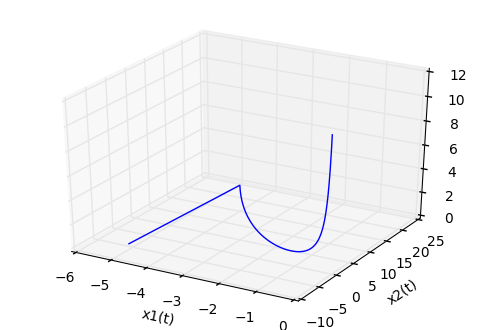

In [15]:
# okey
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_bif1_plus,y_bif1_plus, t)
ax.set_xlabel('x1(t)')
ax.set_ylabel('x2(t)')
ax.set_zlabel('t')
plt.show()

*Вариант 2* 
$$ \dot x_{2\psi_1}(t) = \mu - x^2_{1\psi_1}$$
$$ \psi_1 = x_2 - \mu + x_1^2 $$
$$ u = -2 x_1 x_2 - \frac{(x_2 - \mu + x_1^2)}{T}$$
Получаем замкнутую систему:
$$\begin{cases}
    \dot x_1(t) = x_2\\
    \dot x_2(t) = -2 x_1 x_2 - \frac{(x_2 - \mu + x_1^2)}{T}
  \end{cases} $$

In [3]:
def closedSystemForSaddleNodeBifurcationMinus(y0, t, T, mu):
    x1, x2 = y0
    dxdt = [x2, -2*x1*x2 - (x2 - mu + x1**2)/T]
    return dxdt

In [10]:
sol_bif1_minus = odeint(closedSystemForSaddleNodeBifurcationMinus, [5.1, 5.1], t, args=(T0, mu))
x_bif1_minus = np.transpose(sol_bif1_minus)[0]
y_bif1_minus = np.transpose(sol_bif1_minus)[1]

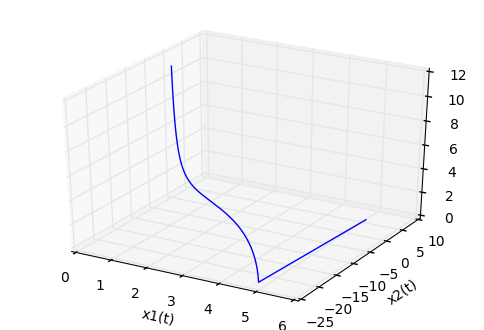

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_bif1_minus, y_bif1_minus, t)
ax.set_xlabel('x1(t)')
ax.set_ylabel('x2(t)')
ax.set_zlabel('t')
plt.show()

##### Решения для бифуркаций типа транскритическая

*Вариант 1* 
$$ \dot x_{2\psi_2}(t) = \mu x_1 + x^2_{1\psi_2}$$
$$ \psi_2 = x_2 - \mu x_1 - x_1^2 $$
$$ u = (\mu + 2x_1)x_2 - \frac{(x_2 - \mu x_1 - x_1^2)}{T}$$
Получаем замкнутую систему:
$$\begin{cases}
    \dot x_1(t) = x_2\\
    \dot x_2(t) = (\mu + 2x_1)x_2 - \frac{(x_2 - \mu x_1 - x_1^2)}{T}
  \end{cases} $$

In [4]:
def closedSystemForTranscriticalBifurcationPlus(y0, t, T, mu):
    x1, x2 = y0
    dxdt = [x2, (mu + 2*x1)*x2 - (x2 - mu*x1 - x1**2)/T]
    return dxdt

In [11]:
sol_bif2_plus = odeint(closedSystemForTranscriticalBifurcationPlus, [-5.1, -5.1], t, args=(T0,mu))
x_bif2_plus = np.transpose(sol_bif2_plus)[0]
y_bif2_plus = np.transpose(sol_bif2_plus)[1]

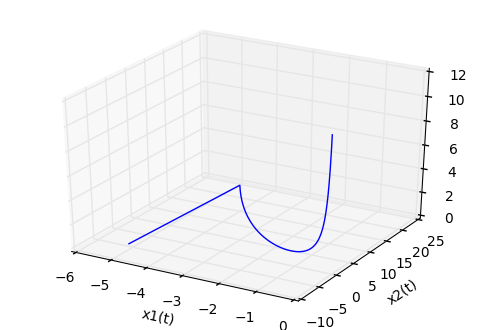

In [17]:
# okey
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_bif2_plus, y_bif2_plus, t)
ax.set_xlabel('x1(t)')
ax.set_ylabel('x2(t)')
ax.set_zlabel('t')
plt.show()

*Вариант 2* 
$$ \dot x_{2\psi_2}(t) = \mu x_1 - x^2_{1\psi_2}$$
$$ \psi_2 = x_2 - \mu x_1 + x_1^2 $$
$$ u = - (- \mu + 2x_1)x_2 - \frac{(x_2 - \mu x_1 + x_1^2)}{T}$$
Получаем замкнутую систему:
$$\begin{cases}
    \dot x_1(t) = x_2\\
    \dot x_2(t) = - (- \mu + 2x_1)x_2 - \frac{(x_2 - \mu x_1 + x_1^2)}{T}
  \end{cases} $$

In [5]:
def closedSystemForTranscriticalBifurcationMinus(y0, t, T, mu):
    x1, x2 = y0
    dxdt = [x2, -(-mu + 2*x1)*x2 - (x2 - mu*x1 + x1**2)/T]
    return dxdt

In [12]:
sol_bif2_minus = odeint(closedSystemForTranscriticalBifurcationMinus, [5.1, 5.1], t, args=(T0,mu))
x_bif2_minus = np.transpose(sol_bif2_minus)[0]
y_bif2_minus = np.transpose(sol_bif2_minus)[1]

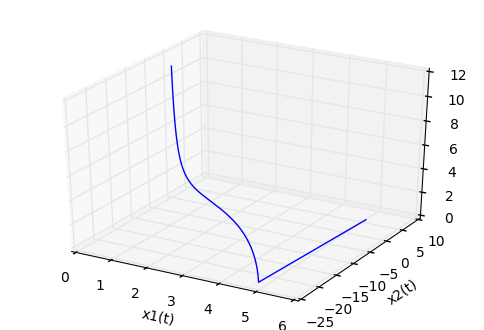

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_bif2_minus, y_bif2_minus, t)
ax.set_xlabel('x1(t)')
ax.set_ylabel('x2(t)')
ax.set_zlabel('t')
plt.show()

##### Решения для бифуркаций типа "Вилка"

*Вариант 1* 
$$ \dot x_{2\psi_3}(t) = \mu x_1 + x^3_{1\psi_3}$$
$$ \psi_3 = x_2 - \mu x_1 - x_1^3 $$
$$ u = (\mu + 3x_1^2)x_2 - \frac{(x_2 - \mu x_1 - x_1^3)}{T}$$
Получаем замкнутую систему:
$$\begin{cases}
    \dot x_1(t) = x_2\\
    \dot x_2(t) = (\mu + 3x_1^2)x_2 - \frac{(x_2 - \mu x_1 - x_1^3)}{T}
  \end{cases} $$

In [6]:
def closedSystemForPitchforkBifurcationPlus(y0, t, T, mu):
    x1, x2 = y0
    dxdt = [x2, (mu + 3*x1**2)*x2 - (x2 - mu*x1 - x1**3)/T]
    return dxdt

In [13]:
sol_bif3_plus = odeint(closedSystemForPitchforkBifurcationPlus, [-0.1, 0.01], t, args=(10.1,0.000000001))
x_bif3_plus = np.transpose(sol_bif3_plus)[0]
y_bif3_plus = np.transpose(sol_bif3_plus)[1]

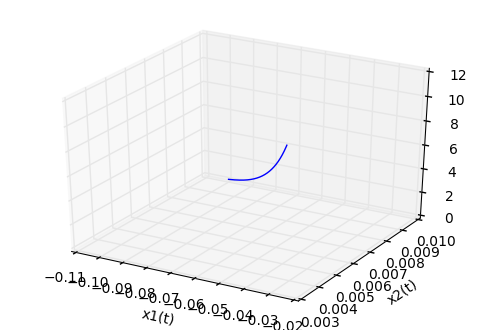

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_bif3_plus, y_bif3_plus, t)
ax.set_xlabel('x1(t)')
ax.set_ylabel('x2(t)')
ax.set_zlabel('t')
plt.show()

*Вариант 2* 
$$ \dot x_{2\psi_3}(t) = \mu x_1 - x^3_{1\psi_3}$$
$$ \psi_3 = x_2 - \mu x_1 + x_1^3 $$
$$ u = -(-\mu + 3x_1^2)x_2 - \frac{(x_2 - \mu x_1 + x_1^3)}{T}$$
Получаем замкнутую систему:
$$\begin{cases}
    \dot x_1(t) = x_2\\
    \dot x_2(t) = -(-\mu + 3x_1^2)x_2 - \frac{(x_2 - \mu x_1 + x_1^3)}{T}
  \end{cases} $$

In [7]:
def closedSystemForPitchforkBifurcationMinus(y0, t, T, mu):
    x1, x2 = y0
    dxdt = [x2, -(-mu + 3*x1**2)*x2 - (x2 - mu*x1 + x1**3)/T]
    return dxdt

In [14]:
sol_bif3_minus = odeint(closedSystemForPitchforkBifurcationMinus, [5.1, 5.1], t, args=(0.001,0.00001))
x_bif3_minus = np.transpose(sol_bif3_minus)[0]
y_bif3_minus = np.transpose(sol_bif3_minus)[1]

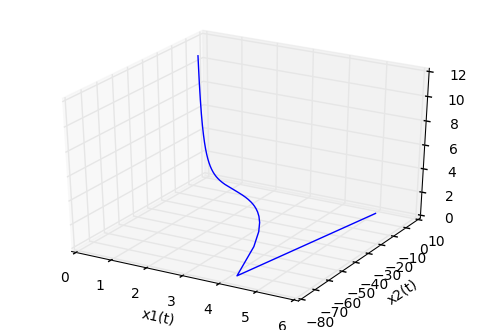

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_bif3_minus, y_bif3_minus, t)
ax.set_xlabel('x1(t)')
ax.set_ylabel('x2(t)')
ax.set_zlabel('t')
plt.show()